In [10]:
# Basic Imports
import tweepy as tw
import pandas as pd     
import numpy as np 
import time
import os
import re

# Plotting and Visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

# TextBlob Imports

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# NLTK Imports
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim


#info apoio
from info_apoio import clean_tweet
from info_apoio import sentiment


In [11]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def sentiment(tweet):
    
    polarity = 0
    
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

# Autentificação

In [12]:
with open("C:\\Users\\leand\\OneDrive\\Documentos\\twitter_keys.txt", 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    acces_token = tfile.readline().strip('\n')
    acces_token_secret = tfile.readline().strip('\n')        
    
    
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(acces_token, acces_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()    

# Criando a base de dados


In [13]:
#Searchin Twitter Timelines
tweets = []
info = []

for tweet in tw.Cursor(api.search_tweets,
                           q = "'lula' OR 'bolsonaro'",
                           tweet_mode = 'extended',
                           # rpp=100,
                           result_type="popular",
                           # include_entities=True,
                           lang="pt").items(1000):
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("lula-bolsonaro.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()

In [14]:
#Construction of the dataframe
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

tweets_df.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
0,🚨HISTÓRICO: Presidente Lula em uma cena RARA d...,162,1612596231909539840,2023-01-09 23:44:36+00:00,Twitter for iPhone,150401,16416,,None,None
1,"Ministro da Justiça foi informado dos ataques,...",295,1612589964536995841,2023-01-09 23:19:42+00:00,Twitter for iPhone,73938,21620,"Brasília, Brasil",None,None
2,Lembram disso. Nos protestos contra o Governo ...,194,1612809947187757056,2023-01-10 13:53:50+00:00,Twitter for iPhone,20016,8175,Porto Alegre,None,None
3,"🚨ATENÇÃO: Sem citar Bolsonaro, o porta-voz do ...",234,1612548448414212114,2023-01-09 20:34:44+00:00,Twitter for iPhone,75887,6765,,None,None
4,🚨VEJA: Bonecos da família Bolsonaro com roupas...,107,1612552470978514945,2023-01-09 20:50:43+00:00,Twitter for iPhone,85005,7426,,None,None
5,Se morrer alguma pessoa no campo de concentraç...,84,1612608755903991808,2023-01-10 00:34:22+00:00,Twitter for iPhone,31590,5651,Rio de Janeiro,None,None
6,"URGENTE: Temendo ser preso, Bolsonaro é intern...",115,1612494815911895041,2023-01-09 17:01:37+00:00,Twitter for iPhone,77738,5771,Minas Gerais,None,None
7,Presidente Lula fala com a imprensa em frente ...,140,1612610886975328263,2023-01-10 00:42:50+00:00,Twitter for iPhone,49512,4845,São Bernardo do Campo,None,None
8,URGENTE: Ministério Público de Contas pede o b...,211,1612853385396371456,2023-01-10 16:46:27+00:00,Twitter for iPhone,43206,4344,Minas Gerais,None,None
9,Agronegócio: braço econômico do terrorismo. E...,278,1612404604360183809,2023-01-09 11:03:09+00:00,Twitter for Android,51261,10194,"São Paulo, Brasil",None,None


# Retweets e curtidas

In [15]:
# Top Searched Tweets
fav_max = np.max(tweets_df['Likes'])
rt_max  = np.max(tweets_df['RTs'])

fav = tweets_df[tweets_df.Likes == fav_max].index[0]
rt  = tweets_df[tweets_df.RTs == rt_max].index[0]

# Max FAVs:
print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][fav]))
print("Número de curtidas: {}".format(fav_max))
print("\n")
# Max RTs:
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))

O tweet com mais curtidas é: 
Decreto assinado por Lula para intervenção federal no Distrito Federal. #EquipeLula https://t.co/1gHjIuDGLf
Número de curtidas: 246447


O tweet com mais retweet é: 
Decreto assinado por Lula para intervenção federal no Distrito Federal. #EquipeLula https://t.co/1gHjIuDGLf
Número de retweets: 36543


# Fonte dos tweets

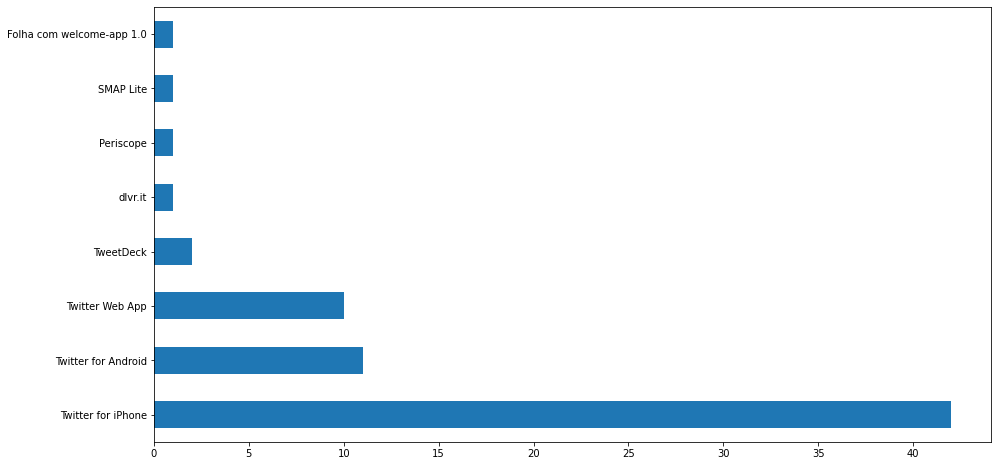

In [16]:
#Source of the Tweets
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
        
newDF = pd.DataFrame({
 'source':percent,
}, index=sources)


sources_sorted = newDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh', figsize=(15, 8))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))       

# Análise de sentimentos com TextBlob


In [17]:
#Sentiment Analysis in Português and English

base_path = 'C:\\Users\\leand\\OneDrive\\Documentos\\nlp\\dados\\'
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r', encoding='utf-8', errors='ignore') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

In [18]:
tweets_df['SA TextBlob'] = np.array([sentiment(tweet) for tweet in tweets_df['Tweets']]) #Portuguese Dictionary
tweets_df['SA TextBlob'].value_counts()

 1    60
-1     9
Name: SA TextBlob, dtype: int64

In [19]:
#Sentiment Analysis Results
pos_tweets = [tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA TextBlob'][index] > 0]
neg_tweets = [tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA TextBlob'][index] < 0]


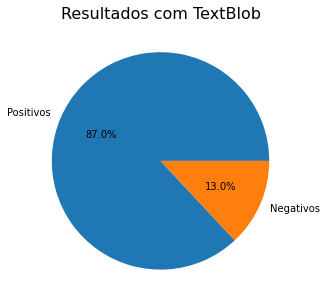

In [20]:
sentiments = ['Positivos', 'Negativos']
percents = [len(pos_tweets), len(neg_tweets)]

fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

ax.pie(percents, labels = sentiments, autopct='%.1f%%')
ax.set_title('Resultados com TextBlob', fontsize=16)

plt.show()


# Análise de sentimentos com NLTK

In [21]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(wordsPT)
modelo = MultinomialNB()
modelo.fit(freq_tweets, wordsPT_sentiments)

MultinomialNB()

In [22]:
tweetsarray = []

for tw in tweets_df['Tweets']:
    text = clean_tweet(tw)
    tweetsarray.append(text)

In [23]:
predictionData = vectorizer.transform(tweets_df['Tweets'])
tweets_df['SA NLTK'] = modelo.predict(predictionData)

In [24]:
#Sentiment Analysis Results
pos_tweets_nltk = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA NLTK'][index] > 0]
neg_tweets_nltk = [ tweet for index, tweet in enumerate(tweets_df['Tweets']) if tweets_df['SA NLTK'][index] < 0]


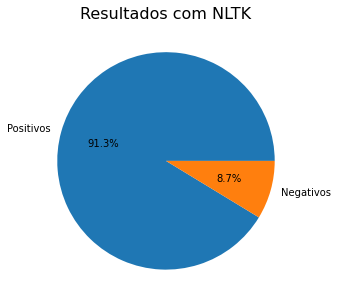

In [25]:
sentiments = ['Positivos', 'Negativos']
percents = [len(pos_tweets_nltk), len(neg_tweets_nltk)]

fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')

ax.pie(percents, labels = sentiments, autopct='%.1f%%')
ax.set_title('Resultados com NLTK', fontsize=16)

plt.show()

In [26]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords= set(STOPWORDS)

new_words = []
with open("stopwords_portuguese.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

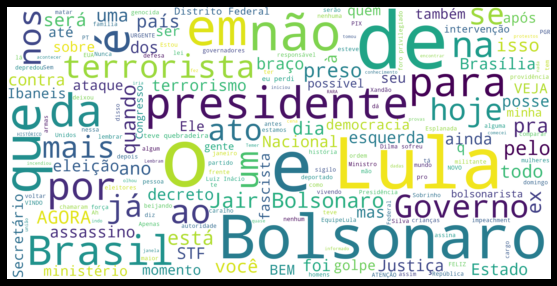

In [27]:
from imageio import imread
import warnings

warnings.simplefilter('ignore')

#twitter_mask = imread('brasil_mask.png')

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               #mask=twitter_mask,
               normalize_plurals= True).generate(words_clean)


fig, ax = plt.subplots(figsize=(12, 5), facecolor='black')

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('lula-bolsonaro.png', dpi=300)
plt.show()